In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np
from sunpy.coordinates import frames
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
flares = pd.read_csv("swpc_event_list.csv")
flares["datetime"] = pd.to_datetime(flares["ts"], format="%Y%m%d%H%M")

In [3]:
flares["datetime"] = pd.to_datetime(flares.datetime)
matchstring = "gev_%Y%m%d_%H%M"
flares["EName"] = flares["datetime"].dt.strftime(matchstring)


In [4]:
flare_pos = pd.read_csv("final_latestevents_scraping.csv")

In [5]:
pos = flare_pos["Derived Position"].replace(np.nan, '', regex=True) \
    + flare_pos["Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength)"].replace(np.nan, '', regex=True)\
    + flare_pos["Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA)"].replace(np.nan, '', regex=True)\
    + flare_pos["Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength)"].replace(np.nan, '', regex=True)

In [6]:
flare_pos["position"] = pos

In [7]:
flare_pos.head(3)

Event#              EName                Start      Stop      Peak  \
0       2  gev_20100102_0709  2010/01/02 07:09:00  07:40:00  07:24:00   
0       6  gev_20100102_1408  2010/01/02 14:08:00  14:24:00  14:16:00   
0       8  gev_20100102_2257  2010/01/02 22:57:00  23:35:00  23:19:00   

  GOES Class  \
0       C1.0   
0       C2.6   
0       C3.1   

  Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength)  \
0                                    S26W41 ( 1039 )                       
0                                    S28W40 ( 1039 )                       
0                                    S27W45 ( 1039 )                       

  Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength)  \
0                                                NaN              
0                                                NaN              
0                                                NaN              

  Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA)  \
0                                                NaN                         
0                                                NaN                         
0                                                NaN                         

  Derived Position         position  
0              NaN  S26W41 ( 1039 )  
0              NaN  S28W40 ( 1039 )  
0              NaN  S27W45 ( 1039 )

In [8]:
flares_pos = flare_pos.drop(columns=["Derived Position", "Derived Position (SECCHI/EUVI (BEACON) or EIT High Cadence Wavelength)", 
                "Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength or SDO/AIA)", 
                "Derived Position (SECCHI/EUVI or EIT High Cadence Wavelength)"])

In [9]:
flares_pos.reset_index(inplace=True, drop=True)

In [10]:
leny = []
for i in range(len(flares_pos)):
    leny.append(len(flares_pos["position"][i].split()))

In [11]:
pos_hgs = []
ar_no = []
for i in range(len(flares_pos)):
    aa = flares_pos["position"][i].split()
    if len(aa)==0:
        pos_hgs.append("")
        ar_no.append("")
    elif (len(aa)==1) or (len(aa)==3):
        pos_hgs.append(aa[0])
        ar_no.append("")
    elif len(aa)==4:
        pos_hgs.append(aa[0])
        ar_no.append("1"+aa[2])
    else:
        print("wahh?")

In [12]:
flares_pos["position_hgs"] = pos_hgs
flares_pos["ar_noaanum_latest"] = ar_no

In [13]:
flares_pos = flares_pos.drop(columns="position")

In [14]:
matched = pd.merge(flares, flares_pos, on="EName", how="left")

In [15]:
matched2 = flares.merge(flare_pos, on="EName")

In [16]:
print(len(flares), len(matched))

8606 8606


In [17]:
len(matched[matched["Stop"].isnull()])

292

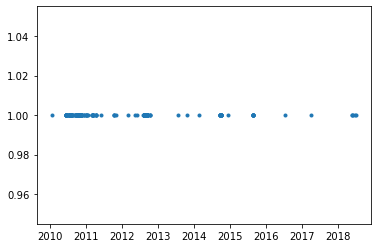

In [18]:
plt.plot(matched[matched["Stop"].isnull()].datetime, np.ones(len(matched[matched["Stop"].isnull()])), marker='.', ls='')

In [19]:
np.sum([matched[matched["Stop"].isnull()]["noaa_ar"].isin(["     "])])

42

In [20]:
matched.head(2)

date  event_no  start_time max_time  end_time goes_sat goes_channel  \
0  20100102      4300         709     0724       740      G14         1-8A   
1  20100102      4370        1408     1416      1424      G14         1-8A   

  goes_class_ind goes_class integrated_flux  ...            ts  \
0              C       C1.0         1.2E-03  ...  201001020709   
1              C       C2.6         1.4E-03  ...  201001021408   

             datetime              EName Event#                Start  \
0 2010-01-02 07:09:00  gev_20100102_0709    2.0  2010/01/02 07:09:00   
1 2010-01-02 14:08:00  gev_20100102_1408    6.0  2010/01/02 14:08:00   

       Stop      Peak GOES Class position_hgs ar_noaanum_latest  
0  07:40:00  07:24:00       C1.0       S26W41             11039  
1  14:24:00  14:16:00       C2.6       S28W40             11039  

[2 rows x 21 columns]

In [21]:
matched.keys()

Index(['date', 'event_no', 'start_time', 'max_time', 'end_time', 'goes_sat',
       'goes_channel', 'goes_class_ind', 'goes_class', 'integrated_flux',
       'noaa_ar', 'ts', 'datetime', 'EName', 'Event#', 'Start', 'Stop', 'Peak',
       'GOES Class', 'position_hgs', 'ar_noaanum_latest'],
      dtype='object')

In [22]:
cols = ["date", "start_time", "max_time", "end_time", "goes_class_ind", "goes_class", "integrated_flux",
        "noaa_ar", "datetime", "Start", "Stop", "Peak", "GOES Class", "position_hgs", "ar_noaanum_latest"]

In [23]:
matched = matched[cols]

In [24]:
def fixy(x):
    if x=="     ":
        return ""
    else:
        return x
matched["noaa_ar"] = matched["noaa_ar"].map(fixy)

In [25]:
test = matched[matched["noaa_ar"]!=matched["ar_noaanum_latest"]]

In [26]:
test.reset_index(inplace=True, drop=True)

In [27]:
lala = []
for i in range(len(test)):
    if len(str(test.iloc[i]["noaa_ar"])) == len(str(test.iloc[i]["ar_noaanum_latest"])):
        print(test.iloc[i][["noaa_ar", "ar_noaanum_latest"]])
        lala.append(test.iloc[i])
lala = pd.DataFrame(lala)

noaa_ar              11149
ar_noaanum_latest    11150
Name: 151, dtype: object
noaa_ar              11160
ar_noaanum_latest    11161
Name: 160, dtype: object
noaa_ar              11161
ar_noaanum_latest    11158
Name: 174, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 189, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 190, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 191, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 193, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 194, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 195, dtype: object
noaa_ar              11162
ar_noaanum_latest    11158
Name: 197, dtype: object
noaa_ar              11158
ar_noaanum_latest    11162
Name: 198, dtype: object
noaa_ar              11161
ar_noaanum_latest    11162
Name: 200, dtype: object
noaa_ar              11165
ar_noaanum_latest    1116

Name: 1062, dtype: object
noaa_ar              11492
ar_noaanum_latest    11488
Name: 1112, dtype: object
noaa_ar              11494
ar_noaanum_latest    11493
Name: 1116, dtype: object
noaa_ar              11494
ar_noaanum_latest    11490
Name: 1127, dtype: object
noaa_ar              11494
ar_noaanum_latest    11490
Name: 1129, dtype: object
noaa_ar              11493
ar_noaanum_latest    11492
Name: 1130, dtype: object
noaa_ar              11499
ar_noaanum_latest    11504
Name: 1133, dtype: object
noaa_ar              11499
ar_noaanum_latest    11504
Name: 1137, dtype: object
noaa_ar              11504
ar_noaanum_latest    11506
Name: 1138, dtype: object
noaa_ar              11507
ar_noaanum_latest    11508
Name: 1139, dtype: object
noaa_ar              11506
ar_noaanum_latest    11504
Name: 1140, dtype: object
noaa_ar              11505
ar_noaanum_latest    11504
Name: 1141, dtype: object
noaa_ar              11499
ar_noaanum_latest    11496
Name: 1142, dtype: object
noaa_ar       

Name: 1704, dtype: object
noaa_ar              11721
ar_noaanum_latest    11722
Name: 1705, dtype: object
noaa_ar              11719
ar_noaanum_latest    11713
Name: 1706, dtype: object
noaa_ar              11711
ar_noaanum_latest    11713
Name: 1707, dtype: object
noaa_ar              11719
ar_noaanum_latest    11718
Name: 1711, dtype: object
noaa_ar              11719
ar_noaanum_latest    11714
Name: 1713, dtype: object
noaa_ar              11726
ar_noaanum_latest    11722
Name: 1715, dtype: object
noaa_ar              11723
ar_noaanum_latest    11722
Name: 1719, dtype: object
noaa_ar              11724
ar_noaanum_latest    11723
Name: 1720, dtype: object
noaa_ar              11731
ar_noaanum_latest    11726
Name: 1727, dtype: object
noaa_ar              11732
ar_noaanum_latest    11726
Name: 1728, dtype: object
noaa_ar              11733
ar_noaanum_latest    11735
Name: 1729, dtype: object
noaa_ar              11732
ar_noaanum_latest    11734
Name: 1731, dtype: object
noaa_ar       

Name: 2088, dtype: object
noaa_ar              11968
ar_noaanum_latest    11967
Name: 2090, dtype: object
noaa_ar              11967
ar_noaanum_latest    11969
Name: 2091, dtype: object
noaa_ar              11967
ar_noaanum_latest    11975
Name: 2092, dtype: object
noaa_ar              11976
ar_noaanum_latest    11975
Name: 2093, dtype: object
noaa_ar              11973
ar_noaanum_latest    11971
Name: 2097, dtype: object
noaa_ar              11977
ar_noaanum_latest    11974
Name: 2098, dtype: object
noaa_ar              11971
ar_noaanum_latest    11975
Name: 2099, dtype: object
noaa_ar              11973
ar_noaanum_latest    11983
Name: 2100, dtype: object
noaa_ar              11973
ar_noaanum_latest    11977
Name: 2101, dtype: object
noaa_ar              11977
ar_noaanum_latest    11982
Name: 2102, dtype: object
noaa_ar              11976
ar_noaanum_latest    11974
Name: 2103, dtype: object
noaa_ar              11976
ar_noaanum_latest    11974
Name: 2105, dtype: object
noaa_ar       

Name: 2366, dtype: object
noaa_ar              12152
ar_noaanum_latest    12151
Name: 2367, dtype: object
noaa_ar              12149
ar_noaanum_latest    12157
Name: 2373, dtype: object
noaa_ar              12152
ar_noaanum_latest    12153
Name: 2375, dtype: object
noaa_ar              12155
ar_noaanum_latest    12157
Name: 2376, dtype: object
noaa_ar              12155
ar_noaanum_latest    12157
Name: 2377, dtype: object
noaa_ar              12157
ar_noaanum_latest    12159
Name: 2378, dtype: object
noaa_ar              12157
ar_noaanum_latest    12159
Name: 2379, dtype: object
noaa_ar              12152
ar_noaanum_latest    12157
Name: 2380, dtype: object
noaa_ar              12163
ar_noaanum_latest    12165
Name: 2382, dtype: object
noaa_ar              12157
ar_noaanum_latest    12165
Name: 2383, dtype: object
noaa_ar              12166
ar_noaanum_latest    12157
Name: 2384, dtype: object
noaa_ar              12161
ar_noaanum_latest    12158
Name: 2385, dtype: object
noaa_ar       

Name: 2553, dtype: object
noaa_ar              12248
ar_noaanum_latest    12253
Name: 2554, dtype: object
noaa_ar              12256
ar_noaanum_latest    12248
Name: 2555, dtype: object
noaa_ar              12251
ar_noaanum_latest    12259
Name: 2558, dtype: object
noaa_ar              12259
ar_noaanum_latest    12257
Name: 2566, dtype: object
noaa_ar              12261
ar_noaanum_latest    12255
Name: 2567, dtype: object
noaa_ar              12259
ar_noaanum_latest    12257
Name: 2568, dtype: object
noaa_ar              12259
ar_noaanum_latest    12257
Name: 2570, dtype: object
noaa_ar              12259
ar_noaanum_latest    12257
Name: 2571, dtype: object
noaa_ar              12260
ar_noaanum_latest    12257
Name: 2572, dtype: object
noaa_ar              12262
ar_noaanum_latest    12255
Name: 2573, dtype: object
noaa_ar              12257
ar_noaanum_latest    12262
Name: 2574, dtype: object
noaa_ar              12260
ar_noaanum_latest    12255
Name: 2575, dtype: object
noaa_ar       

Name: 2864, dtype: object
noaa_ar              12567
ar_noaanum_latest    12565
Name: 2865, dtype: object
noaa_ar              12567
ar_noaanum_latest    12565
Name: 2866, dtype: object
noaa_ar              12567
ar_noaanum_latest    12565
Name: 2867, dtype: object
noaa_ar              12572
ar_noaanum_latest    12574
Name: 2870, dtype: object
noaa_ar              12572
ar_noaanum_latest    12570
Name: 2873, dtype: object
noaa_ar              12574
ar_noaanum_latest    12576
Name: 2876, dtype: object
noaa_ar              12583
ar_noaanum_latest    12578
Name: 2878, dtype: object
noaa_ar              12585
ar_noaanum_latest    12583
Name: 2879, dtype: object
noaa_ar              12585
ar_noaanum_latest    12587
Name: 2880, dtype: object
noaa_ar              12593
ar_noaanum_latest    12589
Name: 2881, dtype: object
noaa_ar              12638
ar_noaanum_latest    12641
Name: 2897, dtype: object
noaa_ar              12645
ar_noaanum_latest    12644
Name: 2898, dtype: object
noaa_ar       

In [28]:
lala[["datetime", "noaa_ar", "ar_noaanum_latest"]][lala["datetime"]>"2012-01-15 20:00"]

datetime noaa_ar ar_noaanum_latest
906  2012-01-17 17:19:00   11401             11405
907  2012-01-17 18:32:00   11401             11409
908  2012-01-17 23:53:00   11401             11409
909  2012-01-18 10:16:00   11401             11409
913  2012-01-21 20:44:00   11402             11401
...                  ...     ...               ...
2924 2017-09-07 22:57:00   12677             12673
2925 2017-09-08 06:24:00   12673             12678
2927 2017-09-09 06:23:00   12673             12676
2928 2017-09-09 07:17:00   12673             12676
2929 2017-09-09 10:50:00   12673             12676

[879 rows x 3 columns]

## Ok some weird stuff with AR connections, but lets get coordinates

In [29]:
matched["position_hgs"]

0       S26W41
1       S28W40
2       S27W45
3       S28W49
4       S28W63
         ...  
8601       NaN
8602       NaN
8603       NaN
8604       NaN
8605       NaN
Name: position_hgs, Length: 8606, dtype: object

In [30]:
match_dict = {"S": -1, "N": 1, "E":-1, "W":1}
def coord_from_hgs(df):
    if not isinstance(df["position_hgs"], str):
        return np.nan
    else:
        lat = match_dict[df["position_hgs"][0]]*int(df["position_hgs"][1:3])
        lon = match_dict[df["position_hgs"][3]]*int(df["position_hgs"][4:6])
        return SkyCoord(lat*u.deg, lon*u.deg, observer="earth", obstime=df["datetime"],
                        frame=frames.HeliographicStonyhurst)

In [32]:
def get_latlon(x):
    try:
        lat = match_dict[x[0]]*int(x[2:3])
        lon = match_dict[x[3]]*int(x[4:6]) 
        return [lat, lon]
    except:
        return [np.nan, np.nan]

In [34]:
values = matched["position_hgs"].map(get_latlon)

In [36]:
values[0]


[-6, 41]

In [226]:
match_dict["E"]

-1

In [228]:
x = matched["position_hgs"][0]

In [229]:
x

'S26W41'

In [231]:
x[1:3]

'26'

In [232]:
x[4:6]

'41'